In [2]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import *
import random
#import ../utils.py
import sys
sys.path.append('../')
from utils import *

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def reduce(dataset):
    return dataset[:int(dataset.shape[0]/2)]

x_train = reduce(x_train)
y_train = reduce(y_train)

Y_train = y_train
Y_test = y_test


num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 

In [3]:
def build_model(weight_decay= 0.0005, x_shape=[32,32,3], num_classes=10):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

    model = Sequential()
#     model.add(Input(shape=()))

    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation= 'relu')) 
    model.add(Dropout(0.5))

    return model

In [4]:
########################################## Building siamese network ###################################


def build_siamese_vgg_model(shape, class_num):
    inputs1 = Input(shape)
    inputs2 = Input(shape)
    

    x1 = build_model()
    x2 = build_model()

    x = layers.concatenate([x1.outputs[0], x2.outputs[0]])
    
    outputs = layers.Dense(num_classes, activation='softmax')(x)  

    # build the model
    model = Model([x1.inputs[0], x2.inputs[0]], outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = build_siamese_vgg_model(x_train[0].shape, num_classes)



In [3]:
def make_pairs(images, labels):
    pairImages = []
    pairLabels = []

    numClasses = len(np.unique(labels))
    idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

    for idxA in range(len(images)):
        currentImage = images[idxA]
        label = labels[idxA]
#         print(currentImage.shape, label)

        
        for idxB in random.sample(list(idx[label[0]]), 1):
            posImage = images[idxB]
#             print(posImage.shape)
#             print('\n\n\n')


            pairImages.append(np.array([currentImage, posImage]))
            pairLabels.append(np.array(label))
        
    return np.array(pairImages), np.array(pairLabels)

In [4]:
######################################################################################################

x_train_siamese, y_train_siamese = make_pairs(x_train, Y_train)
x_test_siamese, y_test_siamese = make_pairs(x_test, Y_test)

y_train_siamese = utils.to_categorical(y_train_siamese, num_classes) 
y_test_siamese = utils.to_categorical(y_test_siamese, num_classes) 

x_train_both = [x_train_siamese[:,0,:], x_train_siamese[:,1,:]]
x_test_both = [x_test_siamese[:,0,:], x_test_siamese[:,1,:]]


print('Images')
print(np.array(x_train_both).shape)
print(np.array(x_test_both).shape)


print('Labels')
print(y_train_siamese.shape)
print(y_test_siamese.shape)

Images
(2, 25000, 32, 32, 3)
(2, 10000, 32, 32, 3)
Labels
(25000, 10)
(10000, 10)


In [8]:


# print(model.summary())

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

history3 = model.fit(x_train_both, y_train_siamese, epochs=400, batch_size=512, shuffle=True,
         validation_data=(x_test_both, y_test_siamese),callbacks=[])


print('Saving model')


Epoch 1/400
49/49 [==============================] - 8s 169ms/step - loss: 1.0121 - accuracy: 0.9420 - val_loss: 1.5517 - val_accuracy: 0.7930
Epoch 2/400
49/49 [==============================] - 8s 161ms/step - loss: 1.0477 - accuracy: 0.9344 - val_loss: 1.6413 - val_accuracy: 0.8016
Epoch 3/400
49/49 [==============================] - 8s 161ms/step - loss: 1.0357 - accuracy: 0.9399 - val_loss: 1.4607 - val_accuracy: 0.8217
Epoch 4/400
49/49 [==============================] - 8s 160ms/step - loss: 1.0163 - accuracy: 0.9442 - val_loss: 1.3717 - val_accuracy: 0.8471
Epoch 5/400
49/49 [==============================] - 8s 160ms/step - loss: 1.0051 - accuracy: 0.9456 - val_loss: 1.4613 - val_accuracy: 0.8275
Epoch 6/400
49/49 [==============================] - 8s 160ms/step - loss: 1.0276 - accuracy: 0.9403 - val_loss: 1.3165 - val_accuracy: 0.8489
Epoch 7/400
49/49 [==============================] - 8s 161ms/step - loss: 1.0449 - accuracy: 0.9381 - val_loss: 1.4011 - val_accuracy: 0.8356

In [9]:
model.save('Cifar10-vgg-siamese-small-400ep.h5')


In [5]:
model = tf.keras.models.load_model("Cifar10-vgg-siamese-small-400ep.h5")

results = full_evaluate(model, x_test_both, Y_test)

print()



accuracy_score: 0.8343
f1_score_macro: 0.8377790980736487
f1_score_weighted: 0.8308209019263513

Accuracy: 0.93757
Confusion matrix:
 [[8646  362]
 [ 274  718]]
F1-score: 0.6930501930501931


2022-01-22 22:03:28.262730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-22 22:03:28.262766: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-22 22:03:28.262792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x-dell): /proc/driver/nvidia/version does not exist
2022-01-22 22:03:28.263109: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


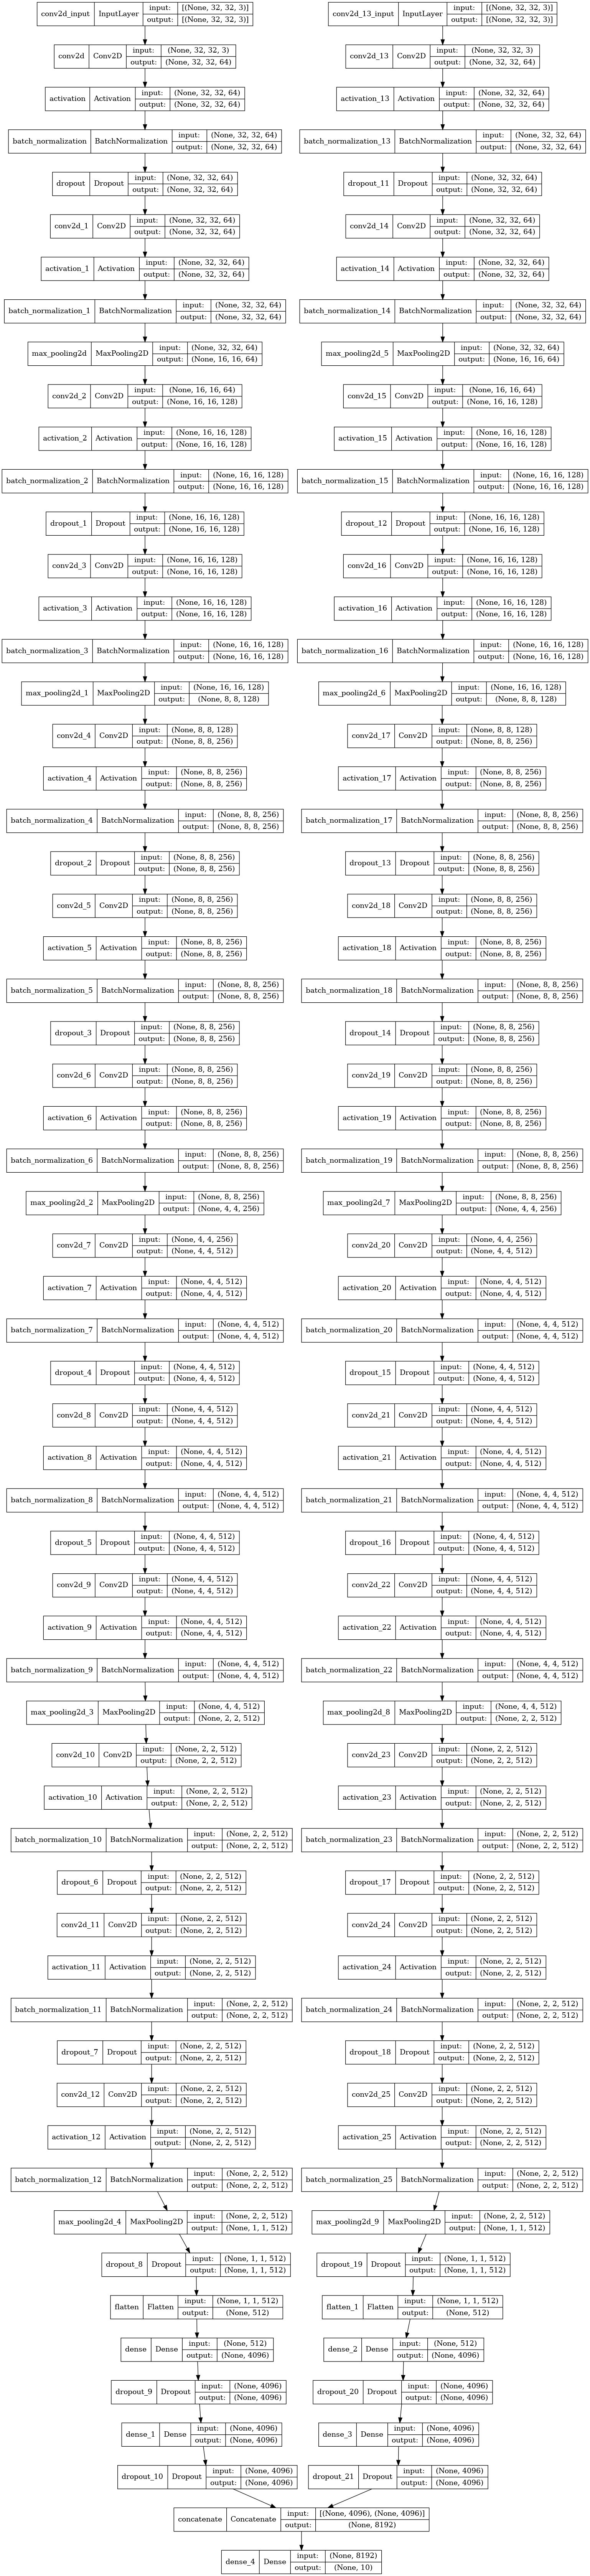

In [3]:
from keras.utils.vis_utils import plot_model
model = tf.keras.models.load_model("Cifar10-vgg-siamese-small-400ep.h5")
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)